# Missing Values

## Introduction

https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00313-w

https://sci2s.ugr.es/MVDM

https://developerzen.com/data-mining-handling-missing-values-the-database-bd2241882e72

https://www.kdnuggets.com/2020/09/missing-value-imputation-review.html

What are Missing Values?

>Missing values are a common occurrence. In real world data, there are some instances where a particular element is absent because of various reasons and you need to have a strategy for treating them. 

How do they occur?

>A missing value can signify a number of different things in your data: 
    - Perhaps the data was not available or not applicable or the event did not happen. 
    - It could be that the person who entered the data did not know the right value, or missed filling in. 
    - Corrupt data.
    - Failure to load the information.
    - Incomplete extraction. 
    
What are the types of Missing values?

>Here we have described briefly the types of missing data. Typically missing data can be of three types:
    <br>**Missing Completely at Random (MCAR)**: Data are missing independently of both observed and unobserved data. 
    Definition: The probability of an instance being missing does not depend on known values or the missing value itself. 
    Example: A data table was printed with no missing values and someone accidentally dropped some ink on it so that some cells are no longer readable. Here, we could assume that the missing values follow the same distribution as the known values.
    <br>**Missing at Random (MAR)**: Given the observed data, data are missing independently of unobserved data. 
    Definition: The probability of an instance being missing may depend on known values but not on the missing value itself.
    Sensor Example: In the case of a temperature sensor, the fact that a value is missing doesn’t depend on the temperature, but might be dependent on some other factor, for example on the battery charge of the thermometer. 
    Survey example: When men and women respond to the question “have you ever taken parental leave?”, men would tend to ignore the question at a different rate compared to women.
    <br>**Missing Not at Random (MNAR)**: Missing observations are related to values of unobserved data itself. 
    Definition: The probability of an instance being missing could depend on the value of the variable itself.
    Sensor example: In the case of a temperature sensor, the sensor doesn’t work properly when it is colder than 5°C. 
    Survey example: In a survey, cheaters are less likely to respond when asked if they have ever cheated.

How can we treat missing values?

>Data mining methods vary in the way they treat missing values. Typically, they ignore the missing values, or exclude any records containing missing values, or replace missing values with the mean, or infer missing values from existing values.

Why imputation is important?

>We use imputation because Missing data can cause the below issues: –
    <br>**Incompatible with most of the Python libraries used in Machine Learning**:- Yes, you read it right. While using the libraries for ML(the most common is skLearn), they don’t have a provision to automatically handle these missing data and can lead to errors.
    <br>**Distortion in Dataset**:- A huge amount of missing data can cause distortions in the variable distribution i.e it can increase or decrease the value of a particular category in the dataset.
    <br>**Affects the Final Model**:- the missing data can cause a bias in the dataset and can lead to a faulty analysis by the model.
    <br>**Another and the most important reason is “We want to restore the complete dataset”**. This is mostly in the case when we do not want to lose any(more of) data from our dataset as all of it is important.
    <br>**Secondly, dataset size is not very big**, and removing some part of it can have a significant impact on the final model.

## Content

1. <a href = "#1.-Checking-for-Missing-Values">Checking for Missing Values</a>
2. <a href = "#2.-Missing-Value-Imputation-Techniques">Missing Value Imputation Techniques</a>
    - Deleting Rows with missing data
    - Deleting the columns with missing data
    - Replacing With Mean/Median/Mode(if Numerical)
    - Replacing With Mode(if Categorical)
    - Assigning An Unique Category
    - Replacement using Statistical Imputation
    - Imputation with ML Algorithms like KNN
    - Predicting The Missing Values

### Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
basepath = '../../Data\\'
df = pd.read_csv(basepath+ 'titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Reading Titanic Dataset from csv file
#df = pd.read_csv('C:/Somashree/Project/DS Code Repository/Missing Values and Imputation/titanic.csv)
#df.head()

## 1. Checking for Missing Values

In [4]:
#To check if there is any missing value present in dataframe
df.isnull().values.any()

True

In [5]:
#Checking missing values in dataframe
df.isnull().sum()
#  OR
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Printing null values column-wise
df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Printing null values Row-wise
df.isnull().sum(axis = 1).head()

0    1
1    0
2    1
3    0
4    1
dtype: int64

In [8]:
#Count NaN values under entire dataframe
df.isna().sum().sum()

866

In [9]:
#Sorting total null values in descending order
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
# check missing values in each column in a loop
import numpy as np, pandas as pd
for col in df:
      print(col +': '+ np.str(df[col].isna().sum()))

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_22300\4212470766.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(col +': '+ np.str(df[col].isna().sum()))


In [11]:
#Calculating % of missing values in each column of dataframe
def missing(df):
        
        mis_val = df.isnull().sum()
        mis_val_percent = round((df.isnull().sum() * 100/ len(df)),2)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1).reset_index()
        mz_table.columns = ['Columns','No.of missing values','% of missing values']
        mz_table = mz_table.sort_values(['% of missing values','No.of missing values','Columns'],ascending = False).reset_index(drop=True)
        #mz_table.to_excel("C:\Somashree\Project\Missing_Value_%.xlsx",index = False)
        return mz_table
missing(df).head()

,Columns,No.of missing values,% of missing values
0,Cabin,687,77.10
1,Age,177,19.87
2,Embarked,2,0.22
3,Ticket,0,0.00
4,Survived,0,0.00


In [12]:
#Checking null values in particular column
print(df['Age'].isnull().sum())

177


<AxesSubplot: >

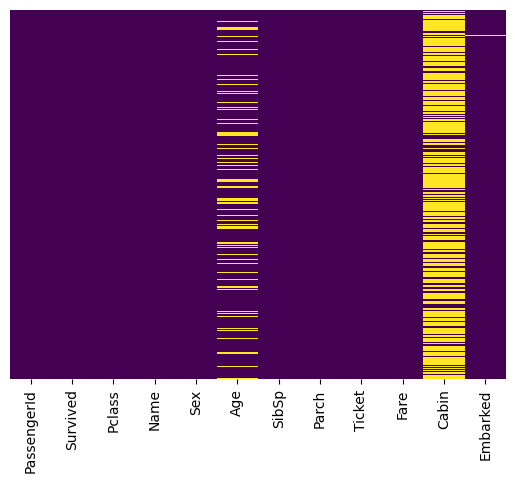

In [13]:
#Visualizing Missing values
import seaborn as sn
sn.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

In [14]:
#Checking if duplicates present in dataframe
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 12)

[<a href="#Content">Back to Content</a>]

## 2. Missing Value Imputation Techniques

#### Deleting Rows with missing data

This method is commonly used to handle the null values. Here, we delete a particular row if it has a null value for a particular feature. This method is advised only when there are enough samples in the data set.

- Pros:
    - Complete removal of data with missing values results in robust and highly accurate model.
    - Deleting a particular row with no specific information is better, since it does not have a high weightage.
- Cons:
    - Loss of information and data.
    - Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset.

In [15]:
updated_df = df.dropna(axis=0)
updated_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
#To drop null values with thresh parameter declaring the max count for NaN values for all columns in DataFrame
df = df.dropna(axis='columns', thresh=3)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Deleting the columns with missing data

This method is commonly used to handle the null values. Here, we delete a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set.

- Pros:
    - Complete removal of data with missing values results in robust and highly accurate model.
    - Deleting a particular column with no specific information is better, since it does not have a high weightage.
- Cons:
    - Loss of information and data.
    - Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset.

In [17]:
updated_df = df.dropna(axis=1)
updated_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

#### Replacing With Mean/Median/Mode when Numerical variable

This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as leaking the data while training. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.  

- Pros:
    - This is a better approach when the data size is small
    - It can prevent data loss which results in removal of the rows and columns
- Cons:
    - Imputing the approximations add variance and bias
    - Works poorly compared to other multiple-imputations method

In [18]:
df['Age'].mean()

29.69911764705882

In [19]:
#Replacing missing value with Mean
df['Age'].replace(np.nan,df['Age'].mean()).head(15)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
Name: Age, dtype: float64

In [20]:
df['Age'].median()

28.0

In [21]:
#Replacing missing value with Median
df['Age'].replace(np.nan,df['Age'].median()).head(15)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     28.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

In [22]:
m =df['Age'].mode()
m[0]

24.0

In [23]:
#Replacing missing value with Mode
df['Age'].replace(np.nan,m[0]).head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     24.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    24.0
18    31.0
19    24.0
Name: Age, dtype: float64

#### Replacing With Mode when Categorical variable

In [24]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [25]:
#Replacing missing value with Mode
df['Embarked'].fillna(df['Embarked'].mode()).head(15)

0     S
1     C
2     S
3     S
4     S
5     Q
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
Name: Embarked, dtype: object

#### Assigning An Unique Category

A categorical feature will have a definite number of possibilities, such as gender, for example. Since they have a definite number of classes, we can assign another class for the missing values. Here, the features Cabin and Embarked have missing values which can be replaced with a new category, say, U for ‘unknown’. This strategy will add more information into the dataset which will result in the change of variance. Since they are categorical, we need to find one hot encoding to convert it to a numeric form for the algorithm to understand it. 

- Pros:
    - Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical
    - Negates the loss of data by adding an unique category
- Cons:
    - Adds less variance
    - Adds another feature to the model while encoding, which may result in poor performance

In [26]:
df['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [27]:
#Replacing null with U meaning Unknown
df['Cabin'].fillna('U').head(10)

0       U
1     C85
2       U
3    C123
4       U
5       U
6     E46
7       U
8       U
9       U
Name: Cabin, dtype: object

#### Statistical Imputation With SimpleImputer

The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation. We will explore how to effectively use the SimpleImputer class.

- SimpleImputer Data Transform

The SimpleImputer is a data transform that is first configured based on the type of statistic to calculate for each column, e.g. mean,medianv for numerical missing values.

In [28]:
#Reading data from csv file
basepath = '../../Data\\'
df = pd.read_csv(basepath+ 'titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
#Imputing Numerical missiing values
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
data = df[['PassengerId','Pclass', 'Survived', 'SibSp', 'Parch', 'Fare', 'Age']]
data = data.values
# print total missing
print('Missing: %d' % sum(isnan(data).flatten()))
# define imputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
# fit on the dataset
imputer.fit(data)
# transform the dataset
datatrans = imputer.transform(data)
# print total missing
print('Missing: %d' % sum(isnan(datatrans).flatten()))
final_df = pd.DataFrame(datatrans)
final_df.columns = ['PassengerId','Pclass', 'Survived', 'SibSp', 'Parch', 'Fare', 'Age']
final_df.head(10)

Missing: 177
Missing: 0


,PassengerId,Pclass,Survived,SibSp,Parch,Fare,Age
0,1.0,3.0,0.0,1.0,0.0,7.2500,22.000000
1,2.0,1.0,1.0,1.0,0.0,71.2833,38.000000
2,3.0,3.0,1.0,0.0,0.0,7.9250,26.000000
3,4.0,1.0,1.0,1.0,0.0,53.1000,35.000000
4,5.0,3.0,0.0,0.0,0.0,8.0500,35.000000
5,6.0,3.0,0.0,0.0,0.0,8.4583,29.699118
6,7.0,1.0,0.0,0.0,0.0,51.8625,54.000000
7,8.0,3.0,0.0,3.0,1.0,21.0750,2.000000
8,9.0,3.0,1.0,0.0,2.0,11.1333,27.000000
9,10.0,2.0,1.0,1.0,0.0,30.0708,14.000000


The SimpleImputer is a data transform that is first configured based on the type of statistic to calculate for each column, e.g. mode for categorical missing values.

In [30]:
#Imputing Categorical missiing values
import pandas as pd
data = df[['Name','Sex', 'Ticket', 'Cabin', 'Embarked']]
data = data.values
# define imputer
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
# fit on the dataset
imputer.fit(data)
# transform the dataset
datatrans = imputer.transform(data)
final_df = pd.DataFrame(datatrans)
final_df.columns = ['Name','Sex', 'Ticket', 'Cabin', 'Embarked']
final_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


#### KNN Imputation

In this technique, the missing values get imputed based on the KNN algorithm i.e. K-nearest-neighbour algorithm.

In this algorithm, the missing values get replaced by the nearest neighbor estimated values.

In [31]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
data = df[['PassengerId','Pclass', 'Survived', 'SibSp', 'Parch', 'Fare', 'Age']]
data = data.values
# print total missing
print('Missing: %d' % sum(isnan(data).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(data)
# transform the dataset
datatrans = imputer.transform(data)
# print total missing
print('Missing: %d' % sum(isnan(datatrans).flatten()))
final_df = pd.DataFrame(datatrans)
final_df.columns = ['PassengerId','Pclass', 'Survived', 'SibSp', 'Parch', 'Fare', 'Age']
final_df.head(10)

Missing: 177
Missing: 0


,PassengerId,Pclass,Survived,SibSp,Parch,Fare,Age
0,1.0,3.0,0.0,1.0,0.0,7.2500,22.0
1,2.0,1.0,1.0,1.0,0.0,71.2833,38.0
2,3.0,3.0,1.0,0.0,0.0,7.9250,26.0
3,4.0,1.0,1.0,1.0,0.0,53.1000,35.0
4,5.0,3.0,0.0,0.0,0.0,8.0500,35.0
5,6.0,3.0,0.0,0.0,0.0,8.4583,26.0
6,7.0,1.0,0.0,0.0,0.0,51.8625,54.0
7,8.0,3.0,0.0,3.0,1.0,21.0750,2.0
8,9.0,3.0,1.0,0.0,2.0,11.1333,27.0
9,10.0,2.0,1.0,1.0,0.0,30.0708,14.0


#### Predicting The Missing Values

Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm.

- Pros:
    - Imputing the missing variable is an improvement as long as the bias from the same is smaller than the omitted variable bias
    - Yields unbiased estimates of the model parameters
- Cons:
    - Bias also arises when an incomplete conditioning set is used for a categorical variable
    - Considered only as a proxy for the true values

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()

data = df[['PassengerId','Pclass', 'Survived', 'SibSp', 'Parch', 'Fare', 'Age']]
df = data
testdf = df[df['Age'].isnull()==True]
traindf = df[df['Age'].isnull()==False]
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
linreg.fit(traindf,y)
testdf.drop("Age",axis=1,inplace=True)
pred = linreg.predict(testdf)
testdf['Age']= pred

traindf['Age']=y

y = traindf['Survived']
traindf.drop("Survived",axis=1,inplace=True)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(traindf,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

y_test = testdf['Survived']
testdf.drop("Survived",axis=1,inplace=True)
pred = lr.predict(testdf)
print(metrics.accuracy_score(pred,y_test))

0.6949152542372882


C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_22300\3665153905.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Age",axis=1,inplace=True)
C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_22300\3665153905.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Age",axis=1,inplace=True)
C:\Users\KVSH2\AppData\Local\Temp\1\ipykernel_22300\3665153905.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

[<a href="#Content">Back to Content</a>]

In [33]:
#tested :no errors